In [1]:
import sqlite3 as lite
import os
import sys
sys.path.insert(0, '../scripts/')
jupyter_directory = os.getcwd()

In [5]:
# import necessary modules
import write_deployinst_input as wr
import analysis as an

In [6]:
# Write the Cyclus Input File
csv_file = '../database/eu_reactors_pris.csv'

reactor_template = '../templates/reactor_template.xml.in'
mox_reactor_template = '../templates/reactor_mox_template.xml.in'
deployinst_template = '../templates/deployinst_template.xml.in'
input_template = '../templates/input_template.xml.in'

# simulation starts at Jan, 01 , 1950, and for 840 months (70 years)
# first one: reprocessing, second one: once-through

# reprocessing case
wr.main(csv_file, 19500101, 840, reactor_template,
        mox_reactor_template, True,
        deployinst_template, input_template, './eu_reprocessing.xml')

#non-reprocessing case
wr.main(csv_file, 19500101, 840, reactor_template,
        mox_reactor_template, False,
        deployinst_template, input_template, './eu.xml')


[13, 32, 33, 34, 38, 103, 104, 105, 106, 109, 127, 147, 162, 175, 181, 182, 183, 184, 185, 186, 187, 188, 189, 198, 207]
[13, 32, 33, 34, 38, 103, 104, 105, 106, 109, 127, 147, 162, 175, 181, 182, 183, 184, 185, 186, 187, 188, 189, 198, 207]


### The input file is created in the folder:

          transition-scenarios/EU_1950_to_2020_reprocess/eu_reprocessing.xml
          transition-scenarios/EU_1950_to_2020_reprocess/eu.xml

###  Run Cyclus on the input file ( This will take ~40 minutes) : 
          
          first: reprocessing
          second: non-reprocessing

In [7]:
!cyclus -o ./eu_reprocessing.sqlite eu_reprocessing.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

In [5]:
!cyclus -o ./eu.sqlite eu.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          eu_reprocessing.sqlite
          eu.sqlite

# Reprocessing Scenario

In [4]:
# Get Final SNF capacity of Reprocessing
# and stacked bar chart of capacity and number of reactors
# Wait for the complete message to move on
import analysis as an
output = 'eu_reprocessing.sqlite'
con = lite.connect(output)
with con:
    cur = con.cursor()
    
    # prints total snf isotopic inventory at the end of simulation
    print(an.snf(cur))
    
    # capacity timeseries
    an.plot_power(cur)
    
    # plot of all the isotope timeseries of source
    plot_in_out_flux(cur, 'source', False, 'source vs time', 'source')
    
    # plot of all the isotope timeseries of sink
    plot_in_out_flux(cur, 'sink', Ture, 'isotope vs time', 'sink')
    
    print('Completed! You may go to the next box')

total snf inventory = 109143819.76553039kg 
Sm152 = 15194.16758418385kg 
Pu240 = 3220.7329873661565kg 
Th232 = 0.0711189984470943kg 
Pb208 = 0.042963847206707546kg 
Eu153 = 20863.633100670326kg 
Nd145 = 112142.02791610325kg 
Pu241 = 2055.2922251126356kg 
Am241 = 26688.539512958112kg 
Pa233 = 0.0016281126225213308kg 
U233 = 0.0007402736367374366kg 
U234 = 16242.197145429955kg 
Pu242 = 1156.57078574157kg 
Th234 = 0.0008111627945384519kg 
Gd155 = 445.61998959584054kg 
Tc99 = 126995.99253287974kg 
Sm147 = 22224.304824615047kg 
U235 = 747491.7961126212kg 
Am243 = 197.29624985785412kg 
Cm243 = 70.61346708468982kg 
Ru99 = 0.035004623838531035kg 
U236 = 640652.4183173262kg 
Cm244 = 15936.532996231294kg 
Np237 = 91962.18157995027kg 
Ag109 = 13493.327929237877kg 
Ru101 = 137201.0654989737kg 
Cs133 = 184824.5758374608kg 
Sm149 = 380.9880827078934kg 
Cm245 = 1247.2737895192208kg 
U237 = 0.006092048634670765kg 
Sm150 = 50571.632407059384kg 
U238 = 106587528.3882359kg 
Pu238 = 421.5282156333824kg 
T

../scripts/analysis.py:287: RuntimeWarning: divide by zero encountered in log
  waste_dict[key] = np.log(waste_dict[key])


AttributeError: 'int' object has no attribute 'replace'

# Once Through Scenario

In [7]:
# Get Final SNF capacity of Reprocessing
# and stacked bar chart of capacity and number of reactors
# Wait for the complete message to move on
import analysis as an
output = 'eu.sqlite'
con = lite.connect(output)
with con:
    cur = con.cursor()
    
    # prints total snf isotopic inventory at the end of simulation
    print(an.snf(cur))
    
    # capacity timeseries
    an.plot_power(cur)
    
    # plot of all the isotope timeseries of source
    plot_in_out_flux(cur, 'source', False, 'source vs time', 'source')
    
    # plot of all the isotope timeseries of sink
    plot_in_out_flux(cur, 'sink', Ture, 'isotope vs time', 'sink')
    
    print('Completed! You may go to the next box')

total snf inventory = 110852475.40029469kg 
U238 = 107973450.8628674kg 
Pu238 = 29379.592604623kg 
U236 = 594833.3420007579kg 
Pu240 = 240938.29295050437kg 
Pu242 = 89641.8384706195kg 
Cm244 = 2510.9269110831874kg 
U235 = 974559.2980769294kg 
Np237 = 79557.35011079352kg 
Pu239 = 619534.8039566575kg 
Pu241 = 212508.3084352237kg 
Am241 = 7189.057559806621kg 
Am243 = 21013.720112011735kg 
Cm245 = 7358.0062382785745kg 

Completed! You may go to the next box


# Capacity and Number of Reactors plot (Same for Both)

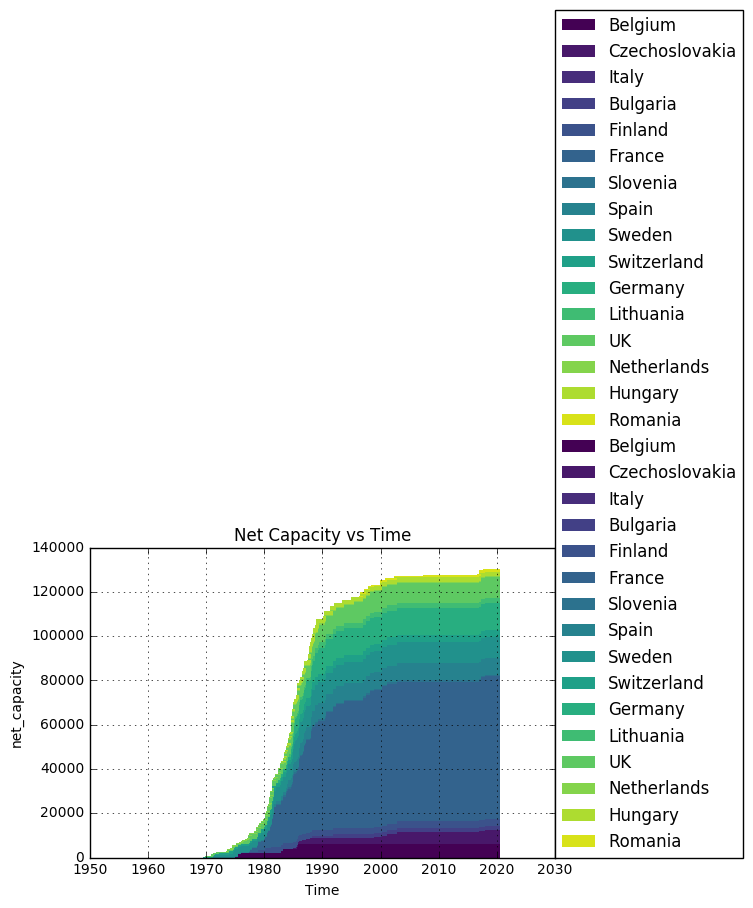

In [8]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

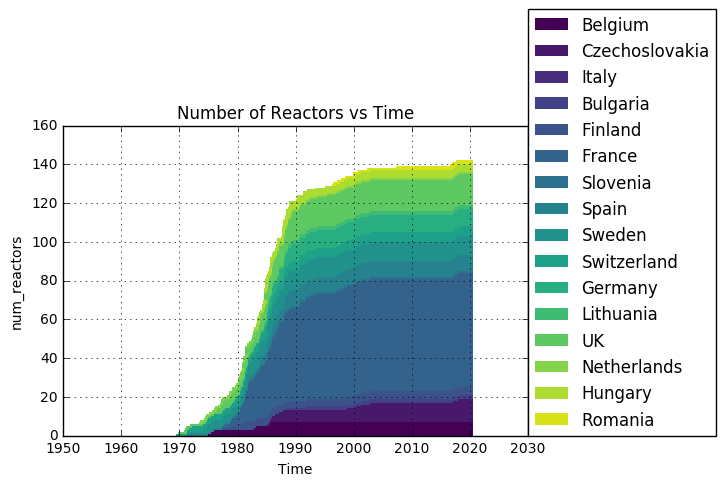

In [9]:
# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='number_plot.png')